# Comm 461 Assignment 1


** SUBMITTED BY: **

Michael Krakovsky 10134030 | Abhit Sahota 10147351 | Aidan Horvath 10132966 | David Aquino 10134911

## Instructions
In the problems below, modify and enter Python 3 code in the code cells as required by the questions. Also, when prompted, provide your written answers in the markdown cells marked as 

*Your answer goes here*

The code you enter is expected to run under default Anacoda package configuration for Python 3 unless stated otherwise. 

---
The code cell below imports several standard packages used in the assignment and performs setup for plots.

In [27]:
# We use numpy for random number generation and data handling
import numpy as np

# We matplotlib package for plotting 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Parameters for figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# We use functionality of Scikit-Learn for fitting linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# A function for plotting RMSE fit for training and testing set over varying training set size
def plot_RMSE_fit(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

## Problem 1: Model Complexity and Regularization
In this problem, we explore a tradeoff between model complexity and its ability to generalize to new data. We use artificially generated data to verify that the tested modelling approaches perform correctly.

The code cell below produces the dataset, fits a straight line model to it and prints the coefficients. **Uncomment the appropriate lines to see the result.**

In [28]:
# The seed controls the dataset that is going to be produced
np.random.seed(11)
# Number of rows
m = 100
# X variable (feature)
X = 20 * np.random.rand(m, 1) - 10
# Label is a numerical value linked to X by a polynomial expression subject to a normal random error
y = 0.013 * X**3 - 1.1 * X + 10 + 3 * np.random.randn(m, 1)

# Create a Linear Regression model object
lin_reg = LinearRegression()
# Fit the model
lin_reg.fit(X, y)
# Print the coefficients
print(lin_reg.intercept_, lin_reg.coef_)

[ 9.7815954] [[-0.31493234]]


### Question (a)
**What are the estimated coefficient values? Has the straight line model recovered the coefficient values assumed when we generated the data? Should we expect the straight line model to be able to recover them? Why or why not?** 

Enter your answer in the markdown cell below:

---

The intercept and slope coefficient values are  9.7815954, and -0.31493234, respectively. The straight line model has not completely recovered the coefficient values that were assumed when the data was generated using the function y = 0.13x^3 -1.1x + 10. For example, the y-intercept assumed during data generation was 10, while the estimated value was close to this at 9.78. The slope coefficient value of -0.31 seems to capture the roughly negative slope of the inputted function within the x-value range of [-10, 10]. We should not expect the straight line model to be able to exactly recover the coefficient values of the assumed function. This is because of the normal random error applied to the original function, which adds an element of randomness to the data, as well as the fact that the original function is non-linear. 

---

The code block below provides a visual examination of the original data and the model on the new data. Uncomment appropriate lines to see the result.

[-10, 10, -5, 25]

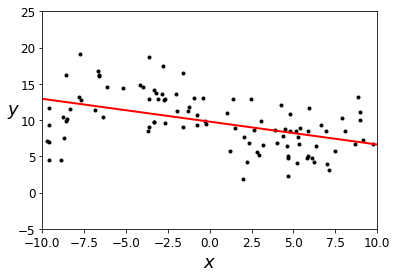

In [29]:
# Construct the x new values to evaluate predicitons on
X_new = np.linspace(-10, 10, 100).reshape(100, 1)

# Evaluate model predictions on new data
y_new = lin_reg.predict(X_new)

# Plot the original data
plt.plot(X, y, "k.")
# Plot predicted values
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
# Add axis labels 
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])


### Question (b)
** What ideas does the plot above provide for improving the model? Explain. **

Enter your answer in the markdown cell below:

---

After viewing the graph above, we can observe that a linear model may not be the best fit for the data. The pattern of the data points displays curvatures which a linear model cannot appropriately model. This implies that a non-linear model may be necessary in order to improve model performance. 

---

The code block below uses linear regression with polynomial features up to a given degree to construct more complex models of the form $y=a_0+a_1 x + a_2 x^2 + \ldots +a_p x^p$ where $p$ is the degree in the polynomial and $a_0, a_1, \ldots, a_p$ are model parameters (coefficients of the polynomial). The constant term $a_0$ will have to be accessed separately (as `intercept_` attribute of the model object) from the rest of the coefficients (that are accessed as `coef_` attribute of the model object). Uncomments the appropriate lines to see the result.

[ 10.51724184] [[-0.33270294 -0.02288147]]
[ 9.91505466] [[ -9.81831122e-01   4.51026485e-02   8.45096147e-03  -6.52894840e-04
    3.52689692e-05]]
[ 10.03859895] [[ -1.70138396e+00   5.08004789e-02   1.27786128e-01  -5.61917181e-03
   -4.95199058e-03   2.09514384e-04   7.52048370e-05  -2.84773182e-06
   -3.72474736e-07   1.23463872e-08]]


[-10, 10, -5, 25]

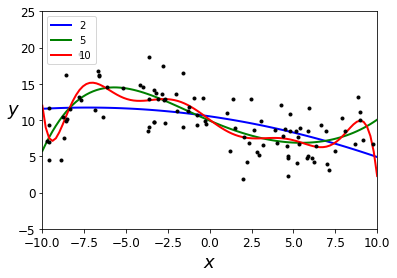

In [30]:
# The loop below iterates over the highest degree used in the model and the corresponding line style in the plot 
for style, degree in (("b-", 2), ("g-", 5), ("r-", 10)):
    # Construct modelling pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("lin_reg", lin_reg),
        ])
    # Fit the model using the constructed pipeline
    polynomial_regression.fit(X, y)
    # Print the intercept and model coefficients
    print(polynomial_regression.named_steps["lin_reg"].intercept_, polynomial_regression.named_steps["lin_reg"].coef_)
    # Get predictions on new data
    y_new_poly = polynomial_regression.predict(X_new)
    # Plot the predicitons
    plt.plot(X_new, y_new_poly, style, label=str(degree), linewidth=2)

# Plot the original data
plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])


### Question (c)
** Based on the plots, comment on performance of each model. Do some of the models manifest under-fitting or over-fitting? Can this be expected given what you know about the data and each model? Explain. **

Enter your answer in the markdown cell below:

---

Degree 2: This model appears to be under-fitted, based on its lack of oscillations in line with the dataset. However, it does appear to better represent the data than the linear regression line used in the previous question. But nevertheless, the oscillating trend of the data is not fully represented with a degree of 2.

Degree 5: This model seems to fit the data well because the model line curves into areas with a higher number of points, while avoiding overly specific curvatures influenced by individual points. 

Degree 10: The red line seems to overfit the data. The line possess too many curvatures and loses its accuracy near the end when the model takes a large dip due to the relatively lower y-value of the point furthest to the right in the data. 

These results can be expected given that the more complex a model (i.e. the more degrees included in the function), the closer it can be expected to fit the training data.  Hence, it makes sense that the “degree 2” model is relatively under fitted, while the “degree 10” model is relatively overfitted. 


---
### Question (d)
**In the code block below, implement the model with the highest degree that, in your opinion would result in the best fit. Print the coeffificients of this model and plot it together with the original training data.**

[ 10.1412431] [[ -9.83240261e-01   1.77205537e-03   9.17879588e-03   6.58023931e-04
    2.56853354e-05  -9.82609865e-06]]


[-10, 10, -5, 25]

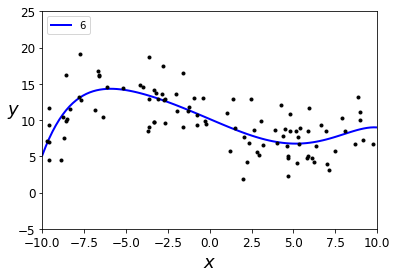

In [31]:
# Construct modelling pipeline
poly_features = PolynomialFeatures(degree=6, include_bias=False)
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg),
    ])
# Fit the model using the constructed pipeline
polynomial_regression.fit(X, y)
# Print the intercept and model coefficients
print(polynomial_regression.named_steps["lin_reg"].intercept_, polynomial_regression.named_steps["lin_reg"].coef_)
# Get predictions on new data
y_new_poly = polynomial_regression.predict(X_new)
# Plot the predicitons
plt.plot(X_new, y_new_poly, "b-", label=str(6), linewidth=2)

# Plot the original data
plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])

---

In the code blocks below we use function plot_RMSE_fit (defined above) to split the data into training and testing sets, train a model on the training set of variable size and plot the error measure (root mean-square error or RMSE) against the training set size. 

We first do it for a straight-line model:

[0, 80, 0, 6]

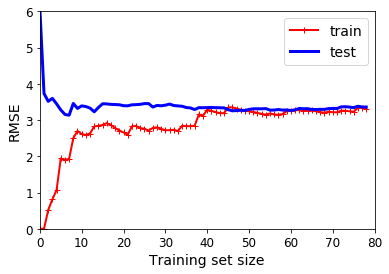

In [32]:
lin_reg = LinearRegression()

plot_RMSE_fit(lin_reg, X, y)
plt.axis([0, 80, 0, 6])  

And then for a polynomial model of degree 10:

[0, 80, 0, 6]

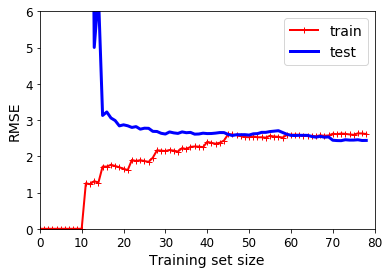

In [33]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_RMSE_fit(polynomial_regression, X, y)
plt.axis([0, 80, 0, 6])

### Question (e)
** What is the name of the blue curve in the plots presented above? What do these curves tell you about the generalization performance of each model as the amount of training data changes? When does each model perform better? Explain. **

Enter your answer in the markdown cell below:

---

The blue curves in the plots are called learning curves. These curves tell us how each respective model performs on holdout or test data, as the amount of training data grows. 

 As the training dataset grows, the lines converge towards the amount of irreducible error that exists within the data set (In this case, this equals an RMSE of approximately 3 for the linear model, and slightly less than 3 for the polynomial regression). Generally, it seems that a larger training dataset results in better performance on test data, up to the point where the aforementioned irreducible error level is reached. 

The linear regression model performs better when the training dataset is smaller than ~20 data points, because the RMSE of the test set decreases to the irreducible error more quickly than it does in the polynomial model. The polynomial regression degree 10 model performs better on a training dataset larger than ~20 values, since after this threshold the amount of irreducible error is slightly less than that which is present in the linear regression model. 


---

Ridge and Lasso regression methods permit automated selection of the model complexity. In particular, LassoCV modelling object below finds optimal model for each alpha and selects optimal alpha by testing the model in a cross-validation approach. The object requires a pre-computed table of all features. In this case, we use polynomial features up to degree 10. Uncomment appropriate lines in the code block below.

In [34]:
# Define transformation pipeline
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

# Generate the matrix of scaled polynomial features
X_poly = poly_scaler.fit_transform(X)

# Fit the model by cross-validation
modelCV = LassoCV(cv = 5).fit(X_poly, y.ravel())

# Print intercept, model coefficients, and optimal alpha
print(modelCV.intercept_)
print(modelCV.coef_)
print(modelCV.alpha_)

9.74283760487
[-3.9912532   0.          0.         -0.          2.65630886 -0.          0.
 -0.          0.         -0.45919843]
0.0771657106491


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Question (f)
** Comment on the model. Has Lasso excluded any features from the model?**

Enter your answer in the markdown cell below:

---

As seen by the zero-value coefficients above, Lasso has excluded seven features from the model. The Lasso model tends to drive covariant coefficients to 0. It therefore appears that the original coefficients displayed a relatively large degree of correlation, but that via regularization Lasso has attempted to correct for this. Interestingly, the y-intercept generated by the Lasso model (9.74) is closer to that which was generated by the linear model in Question 1A (9.78), than the intercept generated by the non-Lasso polynomial degree 10 function (10.04). 

---

LassoCV output also permits visualization of the RMSE values for each fold (and the average RMSE over the folds). Uncomment appropriate lines in the code block below to see this plot.

(-0.40106072376436708,
 2.898939276235633,
 2.340375905481924,
 4.3938206245726299)

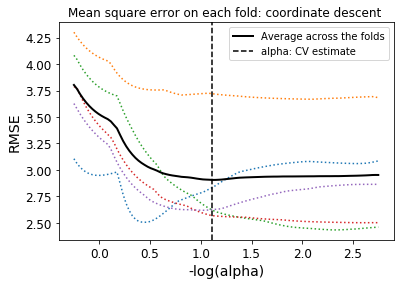

In [35]:
# Display results
m_log_alphas = -np.log10(modelCV.alphas_)

plt.plot(m_log_alphas, np.sqrt(modelCV.mse_path_), ':')
plt.plot(m_log_alphas, np.sqrt(modelCV.mse_path_.mean(axis=1)), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(modelCV.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('RMSE')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

### Question (g)
** What is this type of graph called? What is the best RMSE value seen in this plot and what does it represent? **

Enter your answer in the markdown cell below:

---

This graph is a representation of the results of cross-validation. 

Three separate RMSE values can be considered “best,” depending on the interpretation of the question. We have included all three here.  

The best RMSE value seen in the overall plot is that which is achieved by the holdout set represented by the green line, at a -log(alpha) value of approximately 2.30. This RMSE value is approximately 2.40, representing the best model performance at any level of alpha on any specific set of holdout data. 

However, this alpha value does not provide the best average RMSE across all holdout sets. Lasso sets alpha such that this average RMSE is minimized (visualized by the vertical line in the graph at -log(alpha) = ~1.1). At this level of alpha, the average RMSE is approximately 3.00. This RMSE value represents the approximate level of irreducible error in the data due to its somewhat random nature. This makes sense given that a multiple of 3 was applied to the normal random error used to generate the original data. 

Finally, the specific holdout set which has the best RMSE at this optimal level of alpha is represented by the red line, with an alpha value of approximately 2.6. 

---

Lastly, we plot of the LassoCV model along with the original data. Uncomment appropriate lines below to see the plot.

[-10, 10, -5, 25]

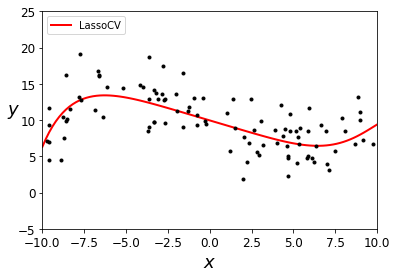

In [36]:
# Need to transform new instances appropriately
X_poly_new = poly_scaler.fit_transform(X_new)

# Compute predictions on the new instances
yCV_new = modelCV.predict(X_poly_new)

# Plot new predictions
plt.plot(X_new, yCV_new, "r-", linewidth=2, label = "LassoCV")

# Plot the original data
plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10, 10, -5, 25])

### Question (h)
** Comment on the apparent fit of this model compared to the best model you constructed in Question (d) **

Enter your answer in the markdown cell below:

---

The best model we constructed in Question (d) was the 6-degree polynomial model. Both this model and the Lasso 10-degree model shown above appear to fit the data well, especially compared to all other models generated in this assignment. Both display oscillations which mirror the data points (and the original function used to create these data points) without a large degree of overfitting. 

Of the two, we believe that the Lasso 10-degree model is somewhat better fitted. It seems that the 6-degree model displays some overfitting, as illustrated by its downward dip on the far right, which is not in line with what would be expected by the original function used to create the training data (y = 0.13x^3 - 1.1x + 10). This seems to have occured due to a relatively outlying data point which can be seen on the bottom right of the graph. In contrast, the Lasso model does not display this characteristic: it slopes upward on the far right and therefore better maps the original function while avoiding being overly influenced by the outlying point in the training dataset. 


---

## Problem 2: Comparison of Tree Classifier and Logistic Regression 

For this problem, we will use a standard Breast Cancer dataset from Scikit Learn library.

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
# DESCR attribute of the dataset provides a high-level description of the data:
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Extract feature vectors and target; split into training and testing. ** Uncomment appropriate lines below. **

In [38]:
X_BC = breast_cancer.data
y_BC = breast_cancer.target

# Set randomness so that we all get the same answer
np.random.seed(841)

# Split the data into train and test pieces for both X and Y
X_train, X_test, y_train, y_test = train_test_split(X_BC, y_BC, train_size=0.80)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Fit the Decision Tree classifier with the maximum deapth of 2 and compute model performence on training and testing. **Uncomment appropriate lines below to see the result.**

In [39]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf2.fit(X_train, y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(tree_clf2.predict(X_train), y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(tree_clf2.predict(X_test), y_test) )

Accuracy on training = 0.9604
Accuracy on test = 0.9123


### Question (a)
** In the code block below, fit a Decision Tree classifier with the maximum depth of 3.**

In [40]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf2.fit(X_train, y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(tree_clf2.predict(X_train), y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(tree_clf2.predict(X_test), y_test) )

Accuracy on training = 0.9780
Accuracy on test = 0.9211


** Comment on the performance of the two decision tree models. Is there evidence of over-fitting? Has the over-fitting problem become worse from increasing the maximum depth of decision tree? Why or why not (explain)? **

---

The 3-level decision tree model resulted in higher model accuracy for both the test and training data. Notably, the training data accuracy is slightly higher than the test data accuracy for both models, which is to be expected. 

There does not seem to be evidence of overfitting yet. This is because increasing the maximum depth from 2 to 3 resulted in an increase in accuracy on the testing data. Overfitting would only begin to occur if an increase in this depth resulted in a decrease in accuracy on the testing data. This can be expected to happen eventually, since a deeper and deeper tree would at some point result in “memorization” of the training data at the expense of model generalization. However, as noted this point has not been reached at a maximum depth of 3. 

---
### Question (b)
** In the code block below, create a Logistic Regression model and compute its performance on the training and testing. The code for creation of the Logistic Regression model is:**

`log_reg = LogisticRegression(random_state=42)`

`log_reg.fit(X_train, y_train)`

In [41]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

---
** In the code block below, we compute the cross-validation performance for each maximum Tree depth from 1 to 20. Uncomment appropriate lines in the code to see the results. **

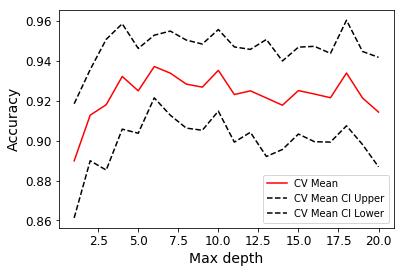

In [42]:
# Lists to store results
accuracies_CV_mean = []
accuracies_CV_std = []

# Depth values
depths = range(1, 21)

# Loop over depth values
for md in depths:
    model_DT = DecisionTreeClassifier(max_depth = md)    
    scores = cross_val_score(model_DT, X_BC, y_BC, cv = 20)
    accuracies_CV_mean.append(np.mean(scores))
    accuracies_CV_std.append(np.std(scores))

# Plot the Mean and Mean+/-Std
plt.plot(depths, accuracies_CV_mean, "r-", label="CV Mean")
plt.plot(depths, np.array(accuracies_CV_mean) + 2.093 * np.array(accuracies_CV_std) / np.sqrt(20), "k--", label="CV Mean CI Upper")
plt.plot(depths, np.array(accuracies_CV_mean) - 2.093 * np.array(accuracies_CV_std) / np.sqrt(20), "k--", label="CV Mean CI Lower")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()


### Question (c)
** What is this type of graph called? What is represented by the accuracy values in this plot? What maximum depth would you select based on this plot and why?**

Enter your answer in the markdown cell below:

---

This graph is called a fitting graph. 

The accuracy values in the graph represent the total number of correctly classified instances, divided by the total number of instances. Hence, it also equals (1 - error rate). 

The maximum depth we would choose is 6 levels, for two reasons. First, the mean accuracy of all holdout sets used in cross-validation is highest at this depth, or at least very close to the highest when compared to a maximum depth of 18. However, a depth of 6 resulted in far lower accuracy variance across the holdout sets, meaning that generalization performance would likely be far more consistent. Therefore, a depth of 6 seems to be optimal.

---
### Question (d)
** Implement cross-validation accuracy assessment for the logistic regression model in the code block below. (NOTE: Do not need to vary model complexity.)**

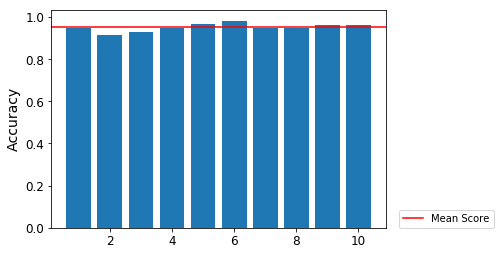

In [81]:
#specify number of cross validation bins
numCVBins = 10
#create array specifing bin number
valuesXArray = [x for x in range(1, numCVBins + 1)]

#discover cross-validation scores
log_reg_Second = LogisticRegression(random_state=42)    
scores = cross_val_score(log_reg_Second, X_BC, y_BC, cv = numCVBins)
means = np.mean(scores)

# Plot the results in bar graph (x, y, width, color)
plt.bar(valuesXArray, scores)
plt.axhline(y=means, color='r', linestyle='-', label="Mean Score")
plt.ylabel("Accuracy")
plt.legend(loc=(1.04,0))

** Compare the logistic regression accuracy to that of your best Decision Tree model. Would you prefer a Decision Tree model or a Logistic Regression model? Consider and discuss accuracy, usability, and interpretability for potential stakeholders. **

---

We would prefer the logistic regression model rather than our best decision tree model (which had a depth of 6). First and foremost, the logistic regression model is more accurate: its mean cross validation accuracy was 0.951, compared to approximately 0.935 for the decision tree model. While an increase of ~1.6% may not seem that large, it is actually quite substantial given that this model will be used for Breast Cancer detection. Given this context, even a small increase in performance has the potential to save lives. The variance in cross validation performance also appeared lower for the logistic regression model, as can be noted on the graph above, meaning that generalization performance will likely be more predictable. 

In terms of usability, our data set is relatively small, at only 569 data points. For smaller data sets, logistic regression models tend to perform better than decision trees, further supporting that the former model type is superior. 

One potential issue with using a logistic regression model is interpretability by stakeholders. Due to their simplicity, tree-based models are easier to understand, especially by those without statistical or mathematical backgrounds. This is important given the medical context of this model, because it will be doctors and/or patients making final decisions, not data scientists. However, we believe that the higher accuracy of the logistic regression model more than justifies this risk given the high-stakes medical context. 


In [84]:
l = " END " * 100
print(l)

 END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END  END 
